### Implementing HDBSCAN to cluster spending habits of accounts

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN, DBSCAN
import seaborn as sns

In [43]:
spending_data = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/Normalised_proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.823946,1.469060,-0.659479,-0.461756,-0.599109,2.363629,0.330532,-0.335033,0.547045,-0.395954,-0.655493,-0.593556,5.031022,-1.163425
1,1002.0,0.206617,2.090178,-0.695943,-0.214125,-0.708981,-0.202244,0.443402,-0.335033,3.472580,0.104802,-0.627263,-0.839066,-0.384490,-0.761329
2,1006.0,-0.141294,-0.598923,0.642122,1.045971,-0.745641,1.381723,-0.817788,-0.335033,0.901520,-0.395954,2.001449,-0.756300,-0.384490,-1.177781
3,1018.0,-0.435344,-1.410646,-0.611389,-0.639188,2.068229,-1.209232,0.391902,-0.335033,-0.652950,-0.395954,1.555709,2.145807,-0.099624,-0.763351
4,1053.0,0.785170,-0.434381,-0.695943,-0.552537,2.356540,-0.107351,1.214833,-0.053129,1.080736,-0.395954,-0.592384,0.945316,-0.384490,-0.998671


Splitting the data into features and targets

In [44]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')

#### Performing dimensionality reduction (UMAP, PCA, t-SNE)

C:\Users\camer\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(8142, 2)


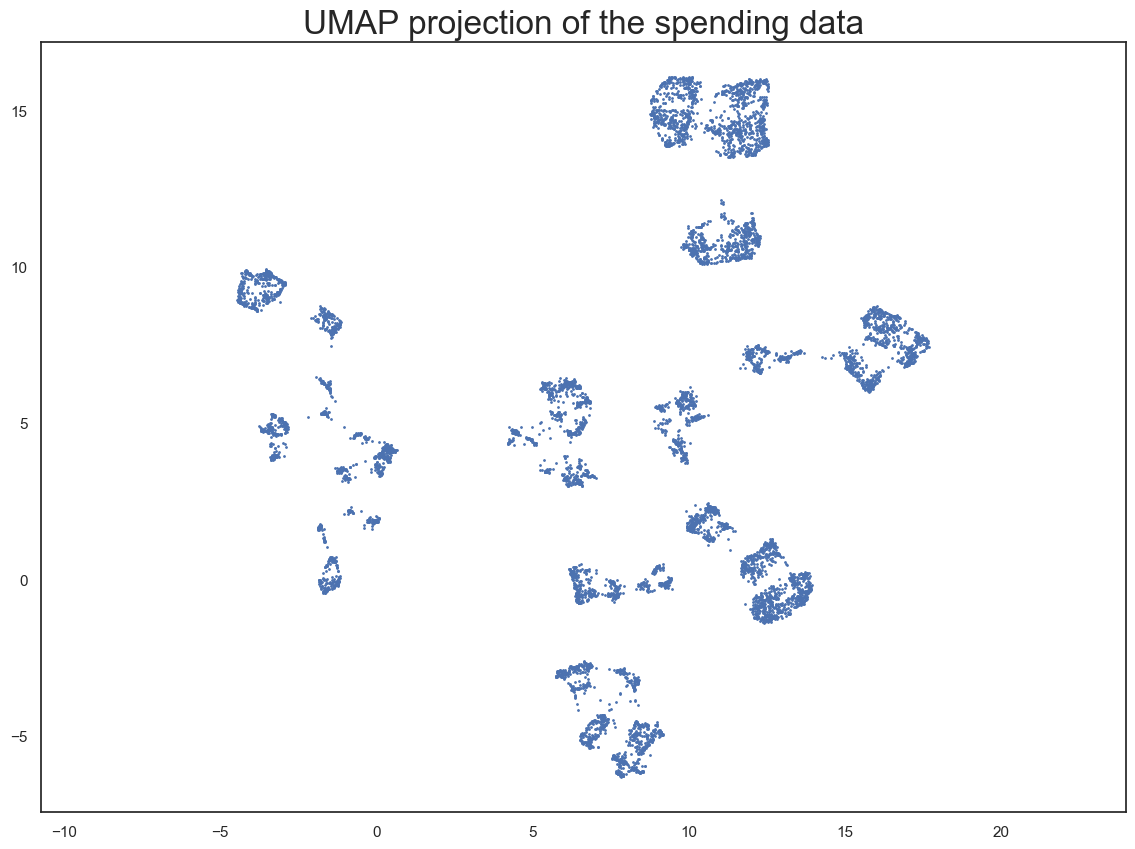

In [83]:
import umap
import matplotlib.pyplot as plt
sns.set(style='white', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP(random_state=3)

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=1,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

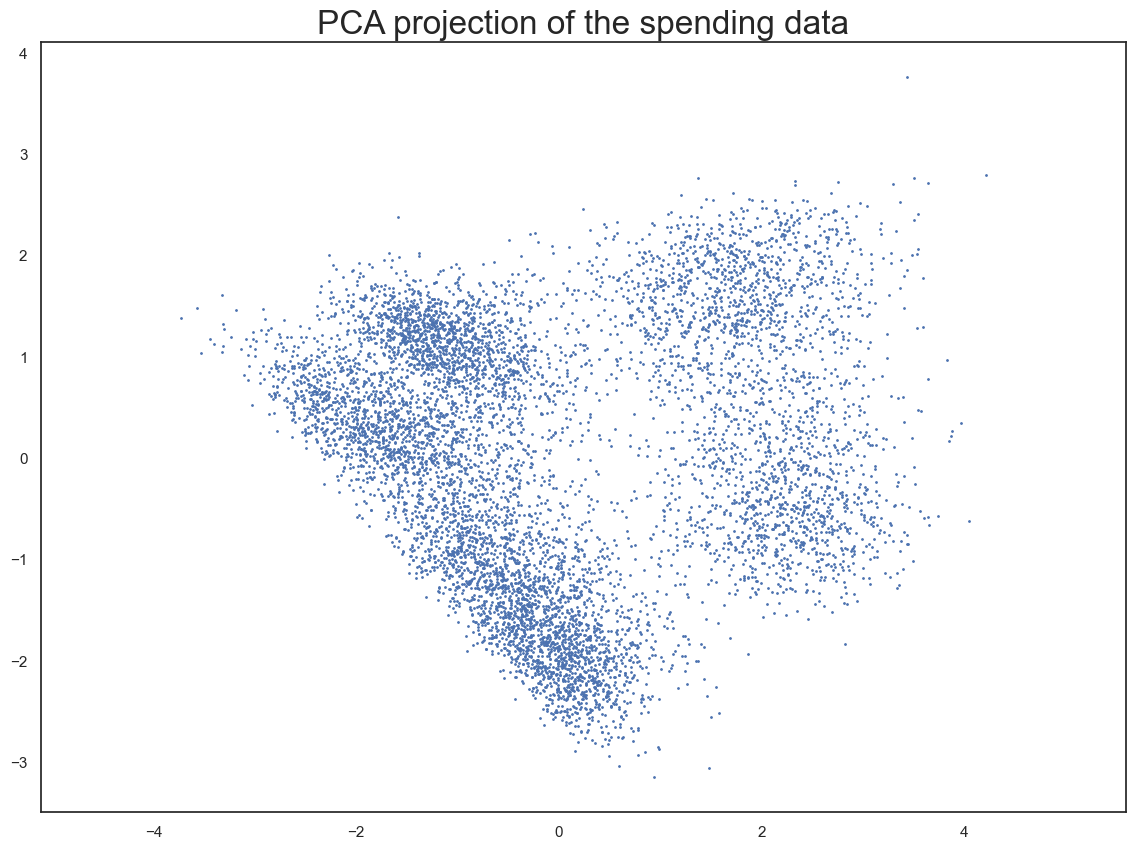

In [81]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=1,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


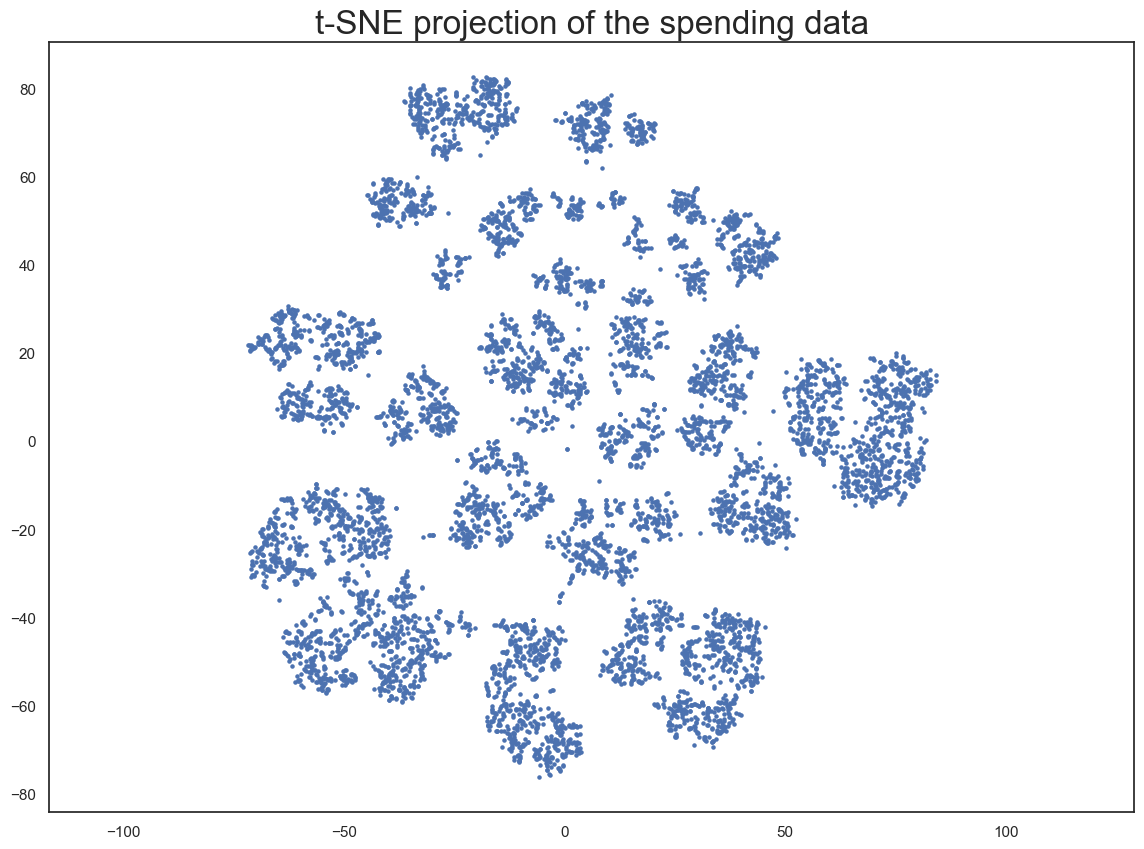

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE()
spending_tsne = tsne.fit_transform(X)

plt.scatter(
    spending_tsne[:, 0],
    spending_tsne[:, 1],
    s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the spending data', fontsize=24)
plt.show()

#### Clustering with HDBSCAN

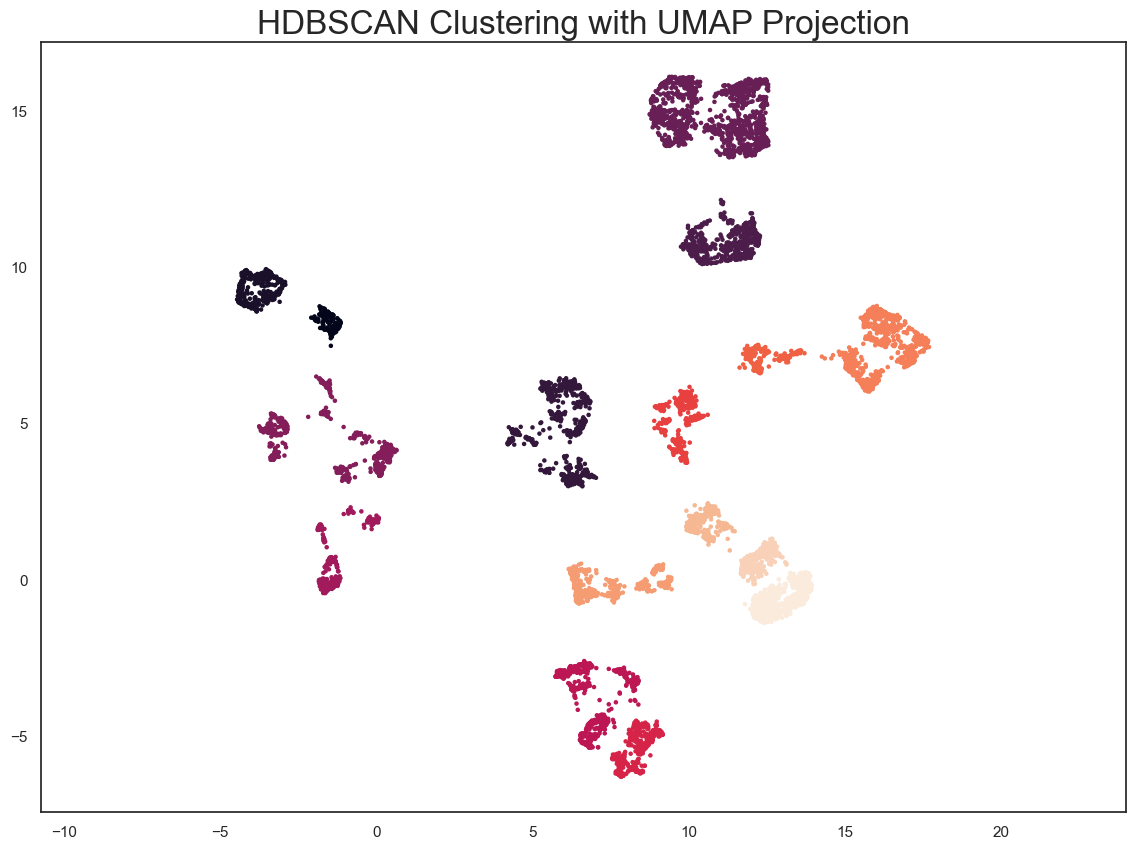

The average silhouette_score is : 0.5858829


In [238]:
from sklearn.metrics import silhouette_score
sns.set(style='white', rc={'figure.figsize':(14,10)})
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

spending_data['cluster_label'].value_counts()

silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

#### Clustering with DBSCAN

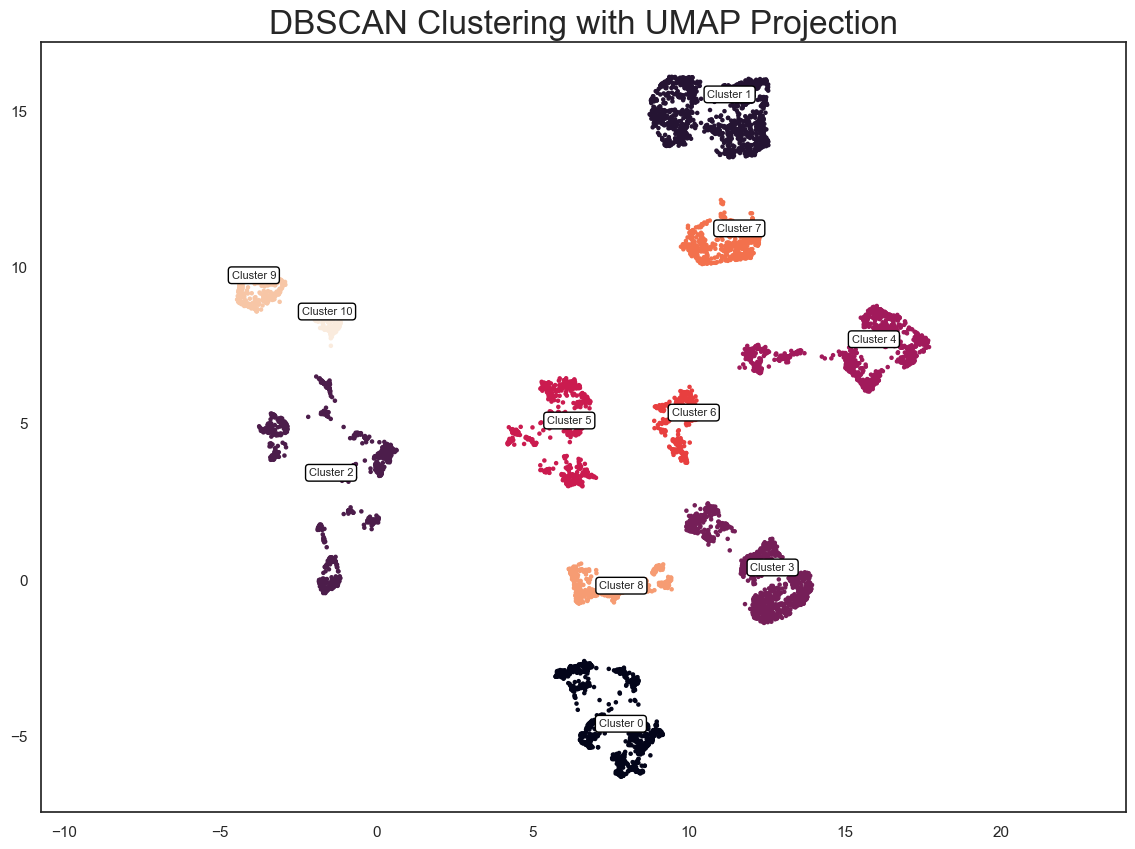

The average silhouette_score is : 0.5818886


In [239]:
from sklearn.metrics import silhouette_score
sns.set(style='white', rc={'figure.figsize':(14,10)})
db = DBSCAN(min_samples=1, eps=1)

cluster_labels = db.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,
)

for label in np.unique(cluster_labels):
    if label == -1:
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

Visualisation for the report

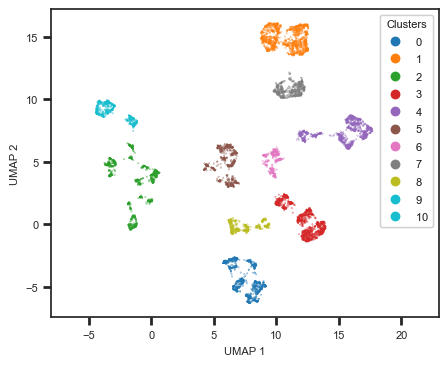

cluster_label
1     1250
3     1175
4     1036
2     1016
0      899
5      767
7      574
8      517
9      385
6      342
10     181
Name: count, dtype: int64
The average silhouette score is: 0.5818886


In [235]:
db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(spending_umap)

plt.figure(figsize=(5, 4))
scatter = plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    c=cluster_labels,
    cmap='tab10',
    s=0.05,
    label=f'Cluster {label}',
)

plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('UMAP 1', fontsize=8)
plt.ylabel('UMAP 2', fontsize=8)
plt.xlim(-10,25)
plt.tick_params(axis='both', direction='out', length=6, width=2, labelsize=8)
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", fontsize=8, loc='upper right')
plt.gca().add_artist(legend1)
legend1.get_title().set_fontsize('8')
plt.savefig("UMAP_with_DBSCAN.png", dpi=300, bbox_inches='tight')
plt.show()

print(spending_data['cluster_label'].value_counts())

silhouette_avg = silhouette_score(spending_umap, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

In [216]:
spending_data.to_csv('Transactional_data_categorical_labels.csv')

#### Plotting accounts within UMAP clusters

In [242]:
cluster_of_interest = 3

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=3)

sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
72256.0,-0.045187,-0.139071,1.735341,-0.731424,2.182286,-0.222309,1.376403,-0.335033,-1.093184,-0.395954,-0.568518,1.159899,-0.384490,-1.035301,3
64608.0,-0.181398,-0.959592,-0.669287,-0.690765,1.952429,-0.598960,-0.345818,-0.335033,0.135297,-0.395954,-0.412418,2.447405,0.101946,0.067521,3
31489.0,0.622077,-1.104277,-0.638918,1.519570,0.434911,-0.645280,-1.038553,-0.335033,-1.048815,-0.395954,-0.614042,0.686832,-0.256410,1.077904,3


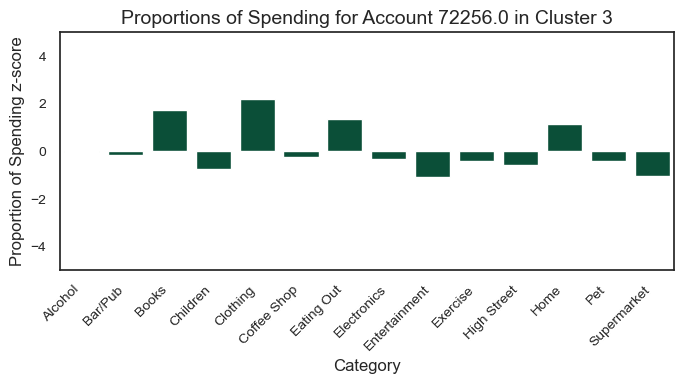

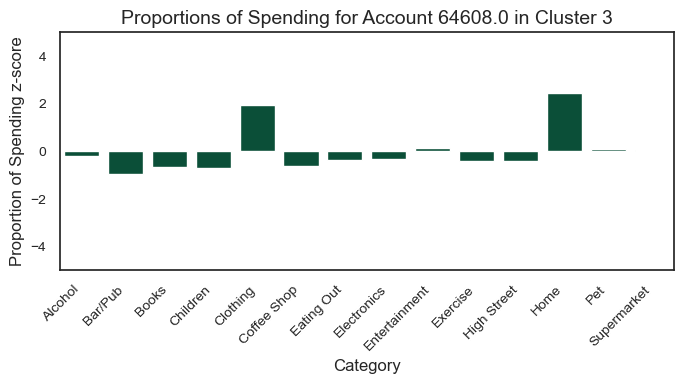

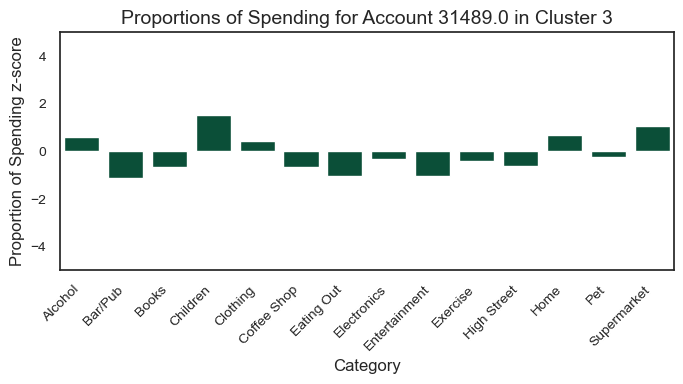

In [243]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(7, 4))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending z-score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-5, 5)
    plt.tight_layout()
    plt.show()

### Visualising the distribution of z-scores in categories within each cluster

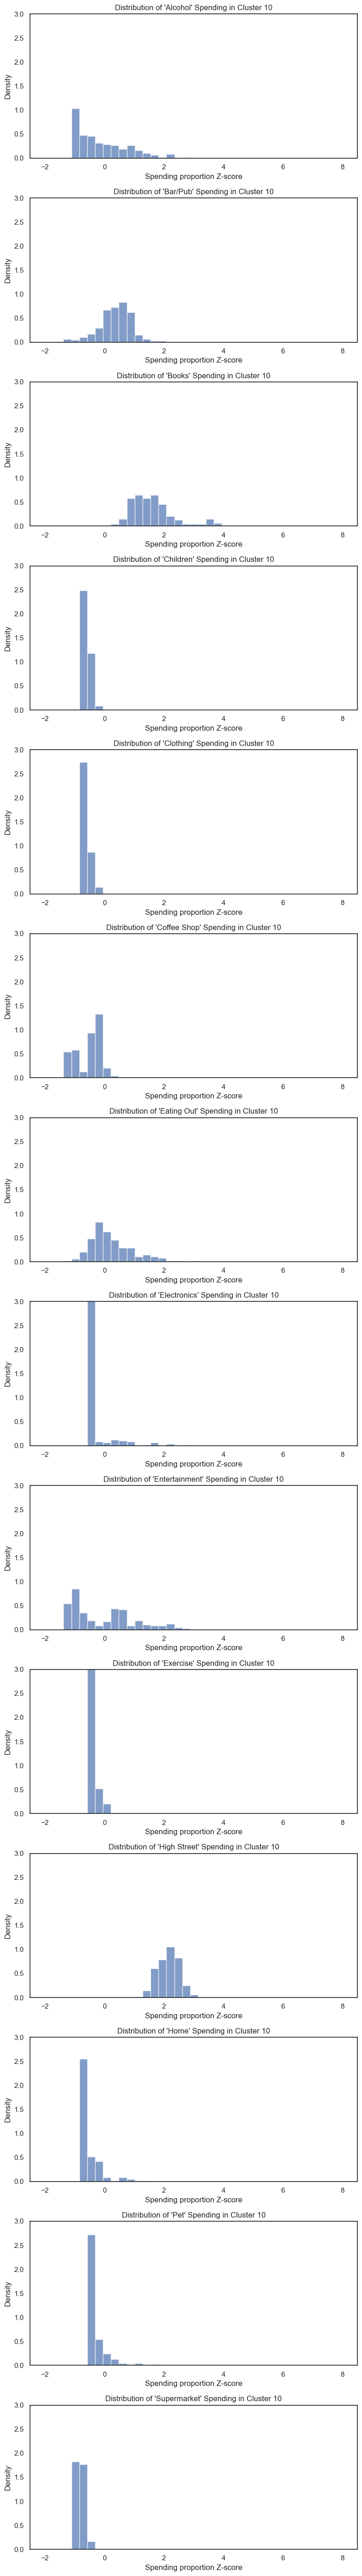

In [244]:
cluster = 10

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns

fig, axs = plt.subplots(len(categories), 1, figsize=(8, len(categories)*4))

min_value = cluster_data[categories].min().min()
max_value = cluster_data[categories].max().max()

num_bins = 20

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7)
    axs[i].set_title(f"Distribution of '{category}' Spending in Cluster {cluster}")
    axs[i].set_xlabel('Spending proportion Z-score')
    axs[i].set_ylabel('Density')
    axs[i].set_xlim(-2.5, 8.5)
    axs[i].set_ylim(0, 3)
plt.tight_layout()
plt.show()

Plotting specific categories for report

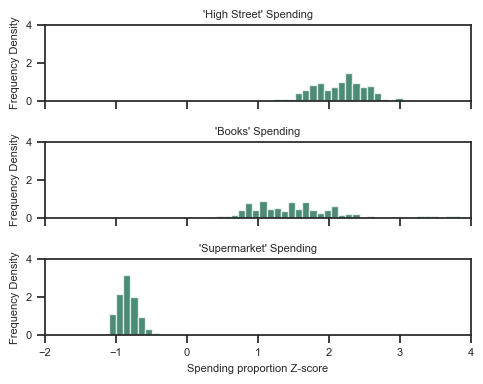

In [236]:
cluster = 10

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

chosen_categories = ['High Street', 'Books', 'Supermarket']


fig, axs = plt.subplots(len(chosen_categories), 1, figsize=(5, 4))

min_value = cluster_data[chosen_categories].min().min()
max_value = cluster_data[chosen_categories].max().max()

num_bins = 50

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(chosen_categories):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7, color='#005a3c')
    axs[i].set_title(f"'{category}' Spending", fontsize=8, loc='center', pad=5)
    axs[i].set_ylabel('Frequency Density', fontsize=8)
    axs[i].tick_params(axis='y', labelsize=8)
    axs[i].set_xlim(-2, 4)
    axs[i].set_ylim(0, 4)

axs[0].tick_params(axis='x', labelbottom= False)
axs[1].tick_params(axis='x', labelbottom= False)
axs[2].set_xlabel('Spending proportion Z-score', fontsize=8)
axs[2].tick_params(labelsize=8)
plt.subplots_adjust(top=1)
plt.savefig("Spending_in_cluster_10.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

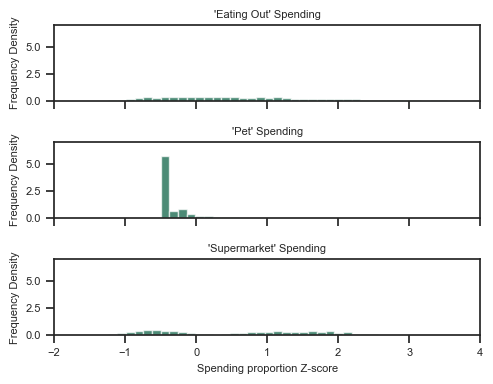

In [237]:
cluster = 1

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

chosen_categories = ['Eating Out', 'Pet', 'Supermarket']


fig, axs = plt.subplots(len(chosen_categories), 1, figsize=(5, 4))

min_value = cluster_data[chosen_categories].min().min()
max_value = cluster_data[chosen_categories].max().max()

num_bins = 50

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(chosen_categories):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7, color='#005a3c')
    axs[i].set_title(f"'{category}' Spending", fontsize=8, loc='center', pad=5)
    axs[i].set_ylabel('Frequency Density', fontsize=8)
    axs[i].tick_params(axis='y', labelsize=8)
    axs[i].set_xlim(-2, 4)
    axs[i].set_ylim(0, 7)

axs[0].tick_params(axis='x', labelbottom= False)
axs[1].tick_params(axis='x', labelbottom= False)
axs[2].set_xlabel('Spending proportion Z-score', fontsize=8)
axs[2].tick_params(labelsize=8)
plt.subplots_adjust(top=1)
plt.savefig("Spending_in_cluster_1.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Visualising using a joy plot, can see all categories at once. Testing other visualisation strategies

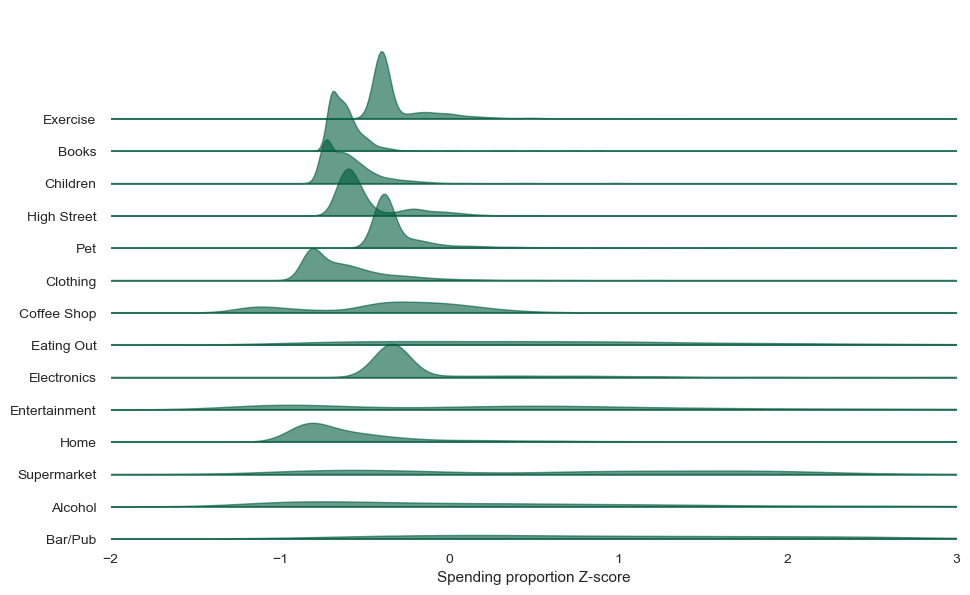

In [246]:
import joypy

cluster =10
cluster_data = spending_data[spending_data['cluster_label'] == cluster]
categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns
categories = ['Exercise', 'Books', 'Children',  'High Street', 'Pet', 'Clothing', 'Coffee Shop',
       'Eating Out', 'Electronics', 'Entertainment',
       'Home', 'Supermarket', 'Alcohol', 'Bar/Pub']

fig, axes = joypy.joyplot(cluster_data[categories], figsize=(10, 6), alpha=0.6, linecolor = "none", color='#005a3c')
for ax in axes:
    ax.set_ylim(-0.1, 10)
    ax.set_xlim(-2,3)
    ax.set_xticks(range(-2,4))
    ax.tick_params(axis='both', labelsize=10)
plt.xlabel('Spending proportion Z-score', fontsize=11)
plt.savefig("Cluster 1 spending distributions.png")
plt.show()

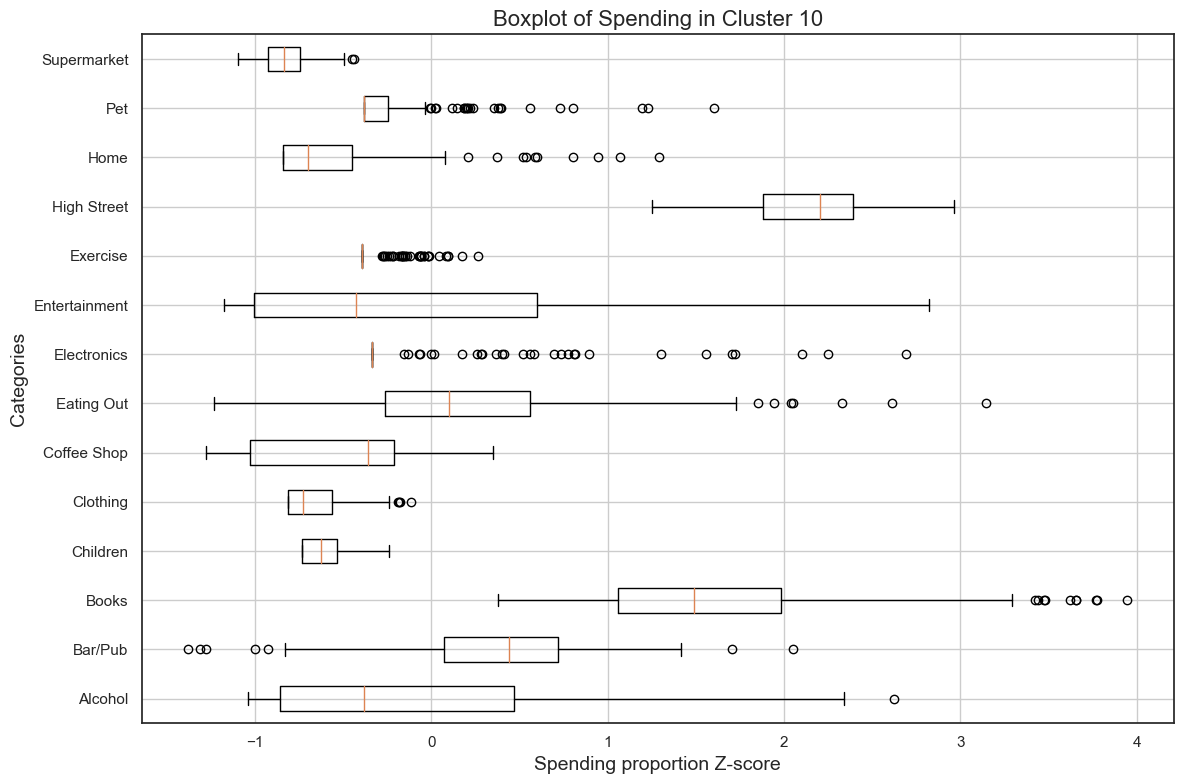

In [249]:
cluster = 10

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns

plt.figure(figsize=(12, 8))
plt.boxplot([cluster_data[category] for category in categories], labels=categories, vert=False)
plt.title(f'Boxplot of Spending in Cluster {cluster}', fontsize=16)
plt.xlabel('Spending proportion Z-score', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

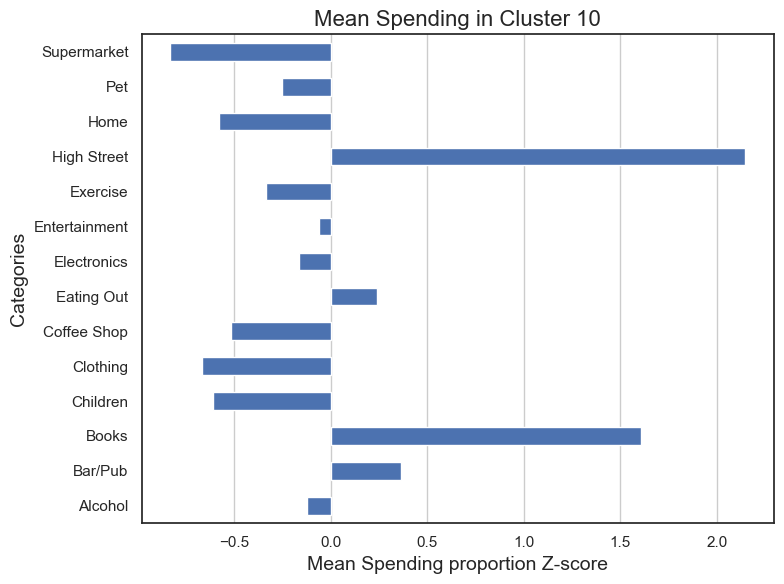

In [248]:
cluster = 10

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

category_means = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).mean()

plt.figure(figsize=(8, 6))
category_means.plot(kind='barh')
plt.title(f'Mean Spending in Cluster {cluster}', fontsize=16)
plt.xlabel('Mean Spending proportion Z-score', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()